# K Nearest Neighbors (KNN)
[LINK MAN](https://www.geeksforgeeks.org/k-nearest-neighbors-with-python-ml/)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [2]:
import sys
sys.path.append("/home/alvaro/Desktop/MachineLearning/PracticalApplications/1-3/my-staff")
from utils import load_ds
from globals import TEST_SIZE, SEED, K_CROSS_VAL

In [3]:
X, y, features_names, class_names = load_ds("all_encoded_cirrhosis")
X.shape

(293, 25)

In [1]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

NameError: name 'X' is not defined

## Elbow Method to choose a good K , with Cros validation

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:

scores = []
RANGE_K = range(1, 100, 5)

for k in RANGE_K:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2) # Euclidean distance
    score = cross_val_score(knn, X, y, cv=K_CROSS_VAL,  scoring='f1_macro')
    scores.append(np.mean(score))

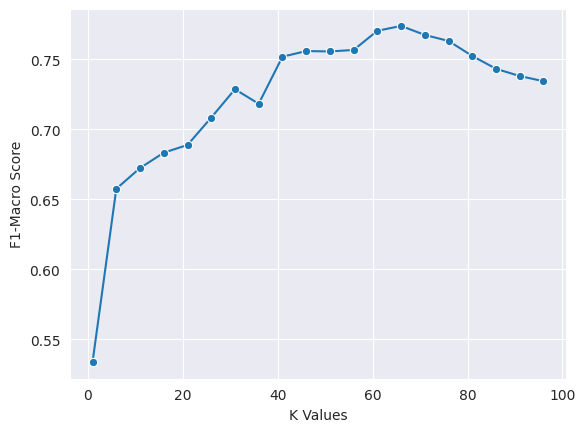

In [8]:
sns.lineplot(x = RANGE_K, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("F1-Macro Score")
plt.show()

In [4]:
from utils import eval_model, show_report

In [5]:
K = 80 # when stabilize

## Hold Out to obtain metrics

In [6]:
from sklearn.model_selection import train_test_split
from globals import TEST_SIZE, SEED


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                y,
                                                                test_size=TEST_SIZE,
                                                                random_state=SEED)

print(len(X_train), len(X_test))

205 88


In [8]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=80)

In [9]:
y_pred = knn.predict(X_test)
eval_model(y_test, y_pred)

Métricas de evaluación:
Precision: 0.8039
Recall: 0.7841
F1-score: 0.7742


In [10]:
show_report(y_test, y_pred)

{'0': {'precision': 0.746031746031746, 'recall': 0.94, 'f1-score': 0.831858407079646, 'support': 50.0}, '1': {'precision': 0.88, 'recall': 0.5789473684210527, 'f1-score': 0.6984126984126985, 'support': 38.0}, 'accuracy': 0.7840909090909091, 'macro avg': {'precision': 0.813015873015873, 'recall': 0.7594736842105263, 'f1-score': 0.7651355527461723, 'support': 88.0}, 'weighted avg': {'precision': 0.8038816738816739, 'recall': 0.7840909090909091, 'f1-score': 0.7742341237916459, 'support': 88.0}}
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        50
           1       0.88      0.58      0.70        38

    accuracy                           0.78        88
   macro avg       0.81      0.76      0.77        88
weighted avg       0.80      0.78      0.77        88



# Decision grid
[link](https://saturncloud.io/blog/visualizing-graph-knn-decision-boundaries-with-matplotlib/)

In [16]:
import pandas  as pd

# Grafo de pares

In [17]:
import seaborn as sns